In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel("stock keeping unit.xlsx")
data.head()

,KODE,NAMA,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
0,17447,INDOMI AYAM SPC/CR,-5.000,32300,0.0,0,36
1,17447,INDOMI AYAM SPC/CR,-1.000,32300,0.0,0,28
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11


In [3]:
#menghapus baris 0 dan 1 yang bernilai minus
data.drop([0,1],axis=0,inplace=True)

In [4]:
data.shape

(14389, 7)

In [5]:
data=data.set_axis(['KODE','NAMA','QTY','HARGA','DISC_%','DISC_RP','SHELF_LIFE'], axis=1)
data.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7
6,26070,S&W CHERY BUAH,0.071,48750,0.0,0,13


In [6]:
# menghapus spasi dan # pada kolom nama
data['NAMA']=data['NAMA'].str.strip()
data['NAMA']=data['NAMA'].replace("#", "")
data.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7
6,26070,S&W CHERY BUAH,0.071,48750,0.0,0,13


In [7]:
data.sort_values(['KODE'],ascending=False)

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE
4821,709054,KIKY'HEART FRAME STA,1.0,10800,0.0,0,30
4879,262992,KISPRAY DUS 4' VLT,1.0,4845,0.0,0,25
4878,262992,KISPRAY DUS 4' VLT,1.0,4845,0.0,0,27
4842,262991,KISPRAY 3IN1 6'KNG,1.0,2040,0.0,0,19
4839,262990,KISPRAY 3IN1 6'BIRU,1.0,2040,0.0,0,9
...,...,...,...,...,...,...,...
8971,13,ROTI BASAH KOTABARU,1.0,3600,0.0,0,24
8970,13,ROTI BASAH KOTABARU,1.0,3800,0.0,0,35
8968,13,ROTI BASAH KOTABARU,1.0,4500,0.0,0,12
8967,13,ROTI BASAH KOTABARU,1.0,4600,0.0,0,33


In [8]:
#buat kolom standar shelf life dengan nilai tertinggi dari kolom shelf_life
def standar_shelf_life(row):
    nilai=data[(data['KODE']==row['KODE'])]['SHELF_LIFE'].max()
    return nilai

data['STANDAR_SHELF_LIFE'] = data.apply(standar_shelf_life, axis=1)

In [9]:
data.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,STANDAR_SHELF_LIFE
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10,34
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6,6
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11,35
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7,7
6,26070,S&W CHERY BUAH,0.071,48750,0.0,0,13,13


In [10]:
#menentukan tanggal mulai dan tgl kadaluarsa dari barang dengan dasar standar
#tanggal shelf_life
import datetime as dt

def tanggal_keluar(row):
    hasil=dt.datetime.today() + dt.timedelta(days=row['SHELF_LIFE'])
    return hasil
                                             
def tanggal_masuk(row):
    hasil=dt.datetime.today() - dt.timedelta(days=(row['STANDAR_SHELF_LIFE']-row['SHELF_LIFE']))
    return hasil
                                       
data['HARI_INI'] = dt.date.today()
data['TGL_MULAI'] = data.apply(tanggal_masuk, axis=1) #tgl produksi barang
data['TGL_SELESAI'] = data.apply(tanggal_keluar, axis=1) #tgl kadaluarsa

data.shape

(14389, 11)

In [11]:
#membuat tabel baru dengan nilai rata-rata dari tabel data 
data_rata=data.groupby(['KODE','NAMA']).agg({'QTY':['sum'],'HARGA':['mean'],'DISC_%':['mean'],'DISC_RP':['mean'],'SHELF_LIFE':['max'],'TGL_MULAI':['min'],'TGL_SELESAI':['max']}).reset_index()
data.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,STANDAR_SHELF_LIFE,HARI_INI,TGL_MULAI,TGL_SELESAI
2,24057,BAWANG PUTIH TIMB.,0.038,9100,0.0,0,10,34,2022-02-03,2022-01-10 16:31:39.808246,2022-02-13 16:31:41.189325
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6,6,2022-02-03,2022-02-03 16:31:39.808246,2022-02-09 16:31:41.189325
4,24543,BAWANG BOMBAY TIMB.,0.056,5500,0.0,0,11,35,2022-02-03,2022-01-10 16:31:39.808246,2022-02-14 16:31:41.189325
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7,7,2022-02-03,2022-02-03 16:31:39.808246,2022-02-10 16:31:41.189325
6,26070,S&W CHERY BUAH,0.071,48750,0.0,0,13,13,2022-02-03,2022-02-03 16:31:39.808246,2022-02-16 16:31:41.189325


In [12]:
data_rata=data_rata.set_axis(['KODE','NAMA','QTY','HARGA','DISC_%','DISC_RP','SHELF_LIFE','TGL_KELUAR','TGL_MASUK'], axis=1)
data_rata.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0.0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0.0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0.0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0.0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0.0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333


In [13]:
#mengganti type kolom disc dan shelf_life ke integer
data_rata[['DISC_%','SHELF_LIFE']]=data_rata[['DISC_%','SHELF_LIFE']].apply(np.int64)
data_rata.shape

(4117, 9)

In [14]:
#menghitung ulang nilai Disc_rp
#membuat kolom harga satuan setelah diskon
#membuat kolom penjualan dari harga setelah diskon
data_rata['DISC_RP']=(data_rata['HARGA']*data_rata['DISC_%'])/100
data_rata['HRG_SAT_DISC']=data_rata['HARGA']-data_rata['DISC_RP']
data_rata['PENJUALAN']=data_rata['QTY']*data_rata['HRG_SAT_DISC']

#Asumsi data adalah data satu bulan, dan quantity adalah penjulan satu bulan
#maka dicari rata2 penjualan perbulan = 30 hari
data_rata['PENJ_PERHARI_QTY'] = data_rata['QTY']/30
data_rata['PENJ_PERHARI_RP'] = data_rata['PENJUALAN']/30
data_rata['PER_MINGGU_QTY'] = data_rata['QTY']/7

In [15]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'PRODUK TERLARIS')

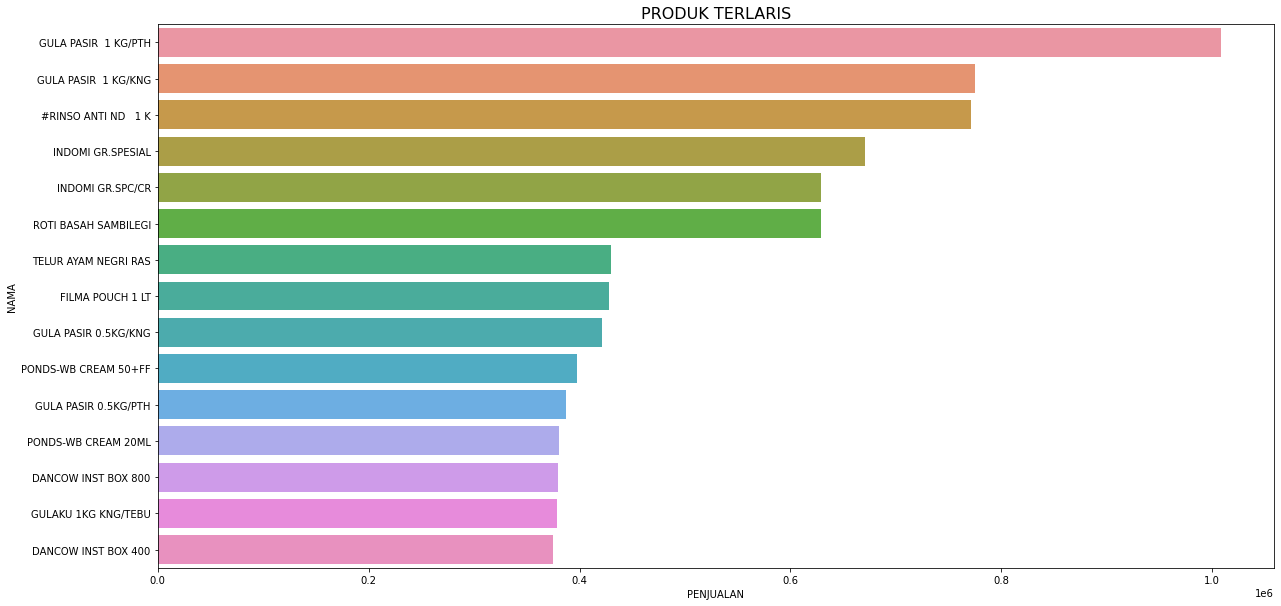

In [16]:
#membuat grafik produk terlaris
data_grafik=data_rata.sort_values('PENJUALAN',ascending=False).head(15)
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="PENJUALAN",y="NAMA", data=data_grafik)
plt.title("PRODUK TERLARIS", fontsize = 16)

[Text(0, 0, 'GULA PASIR  1 KG/PTH'),
 Text(1, 0, 'GULA PASIR  1 KG/KNG'),
 Text(2, 0, '#RINSO ANTI ND   1 K'),
 Text(3, 0, 'INDOMI GR.SPESIAL'),
 Text(4, 0, 'INDOMI GR.SPC/CR'),
 Text(5, 0, 'ROTI BASAH SAMBILEGI'),
 Text(6, 0, 'TELUR AYAM NEGRI RAS'),
 Text(7, 0, 'FILMA POUCH 1 LT'),
 Text(8, 0, 'GULA PASIR 0.5KG/KNG'),
 Text(9, 0, 'PONDS-WB CREAM 50+FF'),
 Text(10, 0, 'GULA PASIR 0.5KG/PTH'),
 Text(11, 0, 'PONDS-WB CREAM 20ML'),
 Text(12, 0, 'DANCOW INST BOX 800'),
 Text(13, 0, 'GULAKU 1KG KNG/TEBU'),
 Text(14, 0, 'DANCOW INST BOX 400'),
 Text(15, 0, 'INDO SKMP 390'),
 Text(16, 0, 'BEND SKMP 387 GR'),
 Text(17, 0, '#CITRA-HBL WHITE 120'),
 Text(18, 0, 'SUPERMI SEDAP GORENG'),
 Text(19, 0, 'FILMA POUCH 2LT/2.2')]

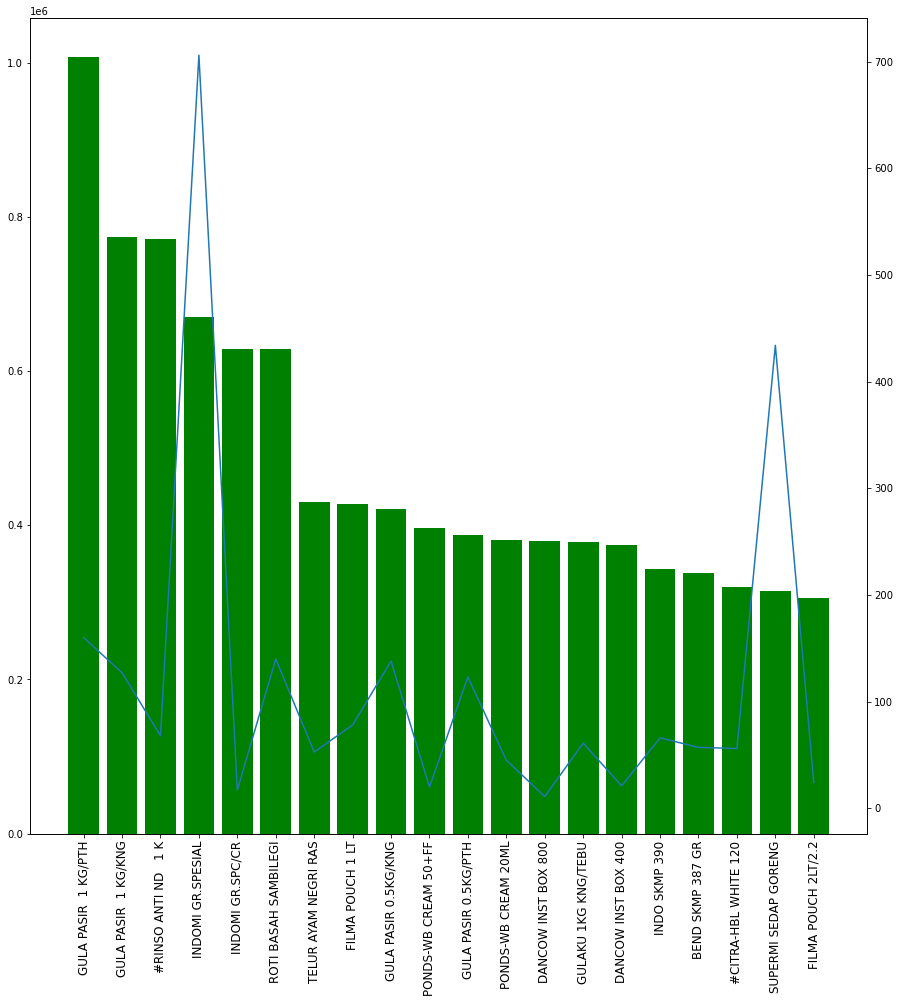

In [17]:
#perbandingan penjualan dengan kuantity
data_grafik2=data_rata.sort_values('PENJUALAN',ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(15, 15))
ax2=ax1.twinx()
ax1.bar(data_grafik2['NAMA'], data_grafik2['PENJUALAN'], color = 'g')
ax2.plot(data_grafik2['NAMA'], data_grafik2['QTY'])
ax1.set_xticklabels(data_grafik2['NAMA'], rotation='vertical' , size=12)

In [18]:
#menghitung cycle counting
# nilai 0 = Harian, 1 Mingguan, 2 Bualanan
def cycle_counting(row):
    if (row['PER_MINGGU_QTY'] <= 1) :
        return 0
    elif ((row['PER_MINGGU_QTY'] > 1) & (row['PER_MINGGU_QTY'] < 4)) :
        return 1
    elif (row['PER_MINGGU_QTY'] >= 4) :
        return 2

data_rata['CYCLE_COUNT'] = data_rata.apply(cycle_counting, axis=1)
data_rata.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0


In [19]:
data_rata.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0


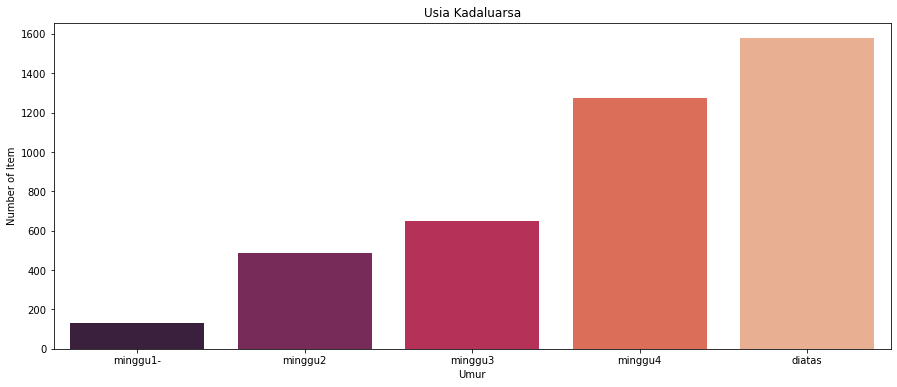

In [20]:
# Menggolongkan usia dan melihat persebarannya dalam data
minggu1 = data_rata.SHELF_LIFE[(data_rata.SHELF_LIFE >0 ) & (data_rata.SHELF_LIFE <= 7)]
minggu2 = data_rata.SHELF_LIFE[(data_rata.SHELF_LIFE > 7) & (data_rata.SHELF_LIFE <= 14)]
minggu3 = data_rata.SHELF_LIFE[(data_rata.SHELF_LIFE >14) & (data_rata.SHELF_LIFE <= 21)]
minggu4 = data_rata.SHELF_LIFE[(data_rata.SHELF_LIFE >21) & (data_rata.SHELF_LIFE <= 30)]
diatas = data_rata.SHELF_LIFE[data_rata.SHELF_LIFE > 30]

x = ["minggu1-","minggu2","minggu3","minggu4","diatas"]
y = [len(minggu1.values),len(minggu2.values),len(minggu3.values),len(minggu4.values),len(diatas.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Usia Kadaluarsa")
plt.xlabel("Umur")
plt.ylabel("Number of Item")
plt.show()

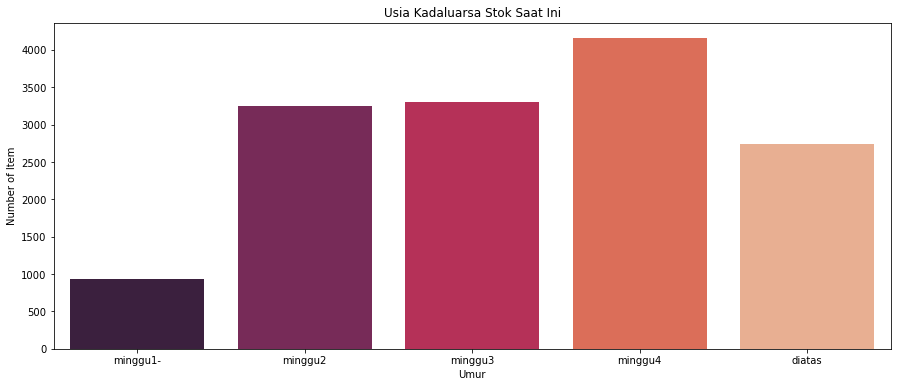

In [21]:
# Menggolongkan usia dan melihat persebarannya dalam data
minggu1 = data.SHELF_LIFE[(data.SHELF_LIFE >0 ) & (data.SHELF_LIFE <= 7)]
minggu2 = data.SHELF_LIFE[(data.SHELF_LIFE > 7) & (data.SHELF_LIFE <= 14)]
minggu3 = data.SHELF_LIFE[(data.SHELF_LIFE >14) & (data.SHELF_LIFE <= 21)]
minggu4 = data.SHELF_LIFE[(data.SHELF_LIFE >21) & (data.SHELF_LIFE <= 30)]
diatas = data.SHELF_LIFE[data.SHELF_LIFE > 30]

x = ["minggu1-","minggu2","minggu3","minggu4","diatas"]
y = [len(minggu1.values),len(minggu2.values),len(minggu3.values),len(minggu4.values),len(diatas.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Usia Kadaluarsa Stok Saat Ini")
plt.xlabel("Umur")
plt.ylabel("Number of Item")
plt.show()

In [22]:
data_rata.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0


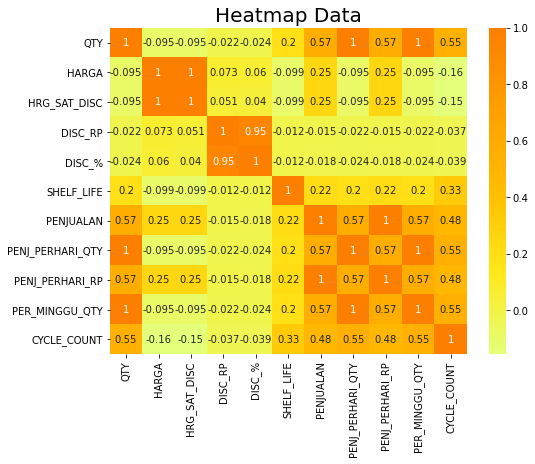

In [23]:
# Features Selection
data_feature=data_rata[['QTY','HARGA','HRG_SAT_DISC','DISC_RP','DISC_%','SHELF_LIFE','PENJUALAN','PENJ_PERHARI_QTY','PENJ_PERHARI_RP','PER_MINGGU_QTY','CYCLE_COUNT']]
plt.figure(figsize=(8,6))
sns.heatmap(data_feature.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [60]:
# Drop variabel yang tidak dibutuhkan
cluster_data = data_rata.drop(['TGL_KELUAR','TGL_MASUK','KODE','NAMA','HRG_SAT_DISC','HARGA','DISC_RP','DISC_%','PENJ_PERHARI_QTY','PENJ_PERHARI_RP','PER_MINGGU_QTY','CYCLE_COUNT'], axis = 1)
cluster_data.head()

,QTY,SHELF_LIFE,PENJUALAN
0,17.0,35,60957.142857
1,140.0,36,628796.875000
2,3.0,30,39945.000000
3,7.0,27,150010.000000
4,5.0,35,107150.000000


In [61]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["PENJUALAN", "QTY","SHELF_LIFE"]] = scaler.fit_transform(cluster_data[["PENJUALAN", "QTY","SHELF_LIFE"]])
cluster_data.head()

,QTY,SHELF_LIFE,PENJUALAN
0,0.637614,1.074622,0.936912
1,7.379473,1.188816,13.720851
2,-0.129752,0.503652,0.463860
3,0.089496,0.161070,2.941785
4,-0.020128,1.074622,1.976865


In [62]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

KMeans(n_clusters=2)

In [63]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="SEGMENT")

In [64]:
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
pd.concat([data_rata, segment], axis=1)

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT,SEGMENT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1,0
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2,1
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,262989,KISPRAY 3IN1 6'MERAH,10.0,2040.000000,0,0.0,27,2022-01-13 16:31:40.726298,2022-03-02 16:31:41.456340,2040.000000,20400.000000,0.333333,680.000000,1.428571,1,0
4113,262990,KISPRAY 3IN1 6'BIRU,16.0,2040.000000,0,0.0,31,2022-01-12 16:31:40.184268,2022-03-06 16:31:41.456340,2040.000000,32640.000000,0.533333,1088.000000,2.285714,1,0
4114,262991,KISPRAY 3IN1 6'KNG,1.0,2040.000000,0,0.0,19,2022-02-03 16:31:40.184268,2022-02-22 16:31:41.456340,2040.000000,2040.000000,0.033333,68.000000,0.142857,0,0
4115,262992,KISPRAY DUS 4' VLT,2.0,4845.000000,0,0.0,27,2022-02-01 16:31:40.186267,2022-03-02 16:31:41.458340,4845.000000,9690.000000,0.066667,323.000000,0.285714,0,0


In [65]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

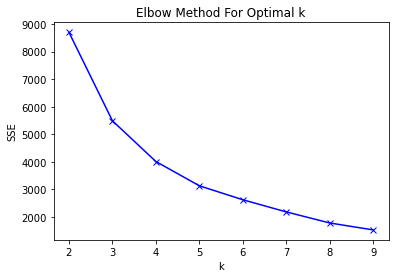

In [66]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3 atau k=4, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 4 dikarenakan jarak antara 2 dan 3 terlalu jauh. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

In [67]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8646844455136375
For n_clusters = 3, silhouette score is 0.5153509758239659
For n_clusters = 4, silhouette score is 0.5258076195625737
For n_clusters = 5, silhouette score is 0.5491573215218222
For n_clusters = 6, silhouette score is 0.4497873947922258
For n_clusters = 7, silhouette score is 0.4358301266949296
For n_clusters = 8, silhouette score is 0.44363492074298644
For n_clusters = 9, silhouette score is 0.4545480321739174


Dari silhouette model didapat k-kluster yang optimum adalah 2, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=2 yang artinya customer akan dibagi kedalam 2 kelompok.

In [68]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

KMeans(n_clusters=2)

In [69]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([data_rata, segment], axis=1)
results.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT,SEGMENT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1,0
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2,1
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0,0


In [70]:
# Menampilkan 5 data teratas dari cluster 0
results[results["SEGMENT"]==0][:5]

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT,SEGMENT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1,0
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0,0
5,1020,SGM 3 MADU BOX 300,1.0,13505.000000,0,0.0,22,2022-02-03 16:31:40.527287,2022-02-25 16:31:41.719355,13505.000000,13505.000000,0.033333,450.166667,0.142857,0,0


In [71]:
# Menampilkan 5 data teratas dari cluster 0
results[results["SEGMENT"]==1][:5]

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT,SEGMENT
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2,1
26,1123,SGM 3 VANILA BOX 600,13.0,23082.222222,0,0.0,36,2022-01-06 16:31:40.528287,2022-03-11 16:31:41.720355,23082.222222,300068.888889,0.433333,10002.296296,1.857143,1,1
32,1174,SGM 2 BOX 600 GR,12.0,25340.000000,0,0.0,35,2022-01-15 16:31:40.527287,2022-03-10 16:31:41.719355,25340.000000,304080.000000,0.400000,10136.000000,1.714286,1,1
99,3076,DANCOW INST BOX 800,11.0,34525.000000,0,0.0,36,2022-01-04 16:31:40.021258,2022-03-11 16:31:41.335333,34525.000000,379775.000000,0.366667,12659.166667,1.571429,1,1
108,3101,INDO SKMP 390,66.0,5200.000000,0,0.0,28,2022-01-14 16:31:40.142265,2022-03-03 16:31:41.869364,5200.000000,343200.000000,2.200000,11440.000000,9.428571,2,1


In [72]:
labels = cluster.labels_
centroids = cluster.cluster_centers_
print(centroids)
print(labels)

[[-0.05420882 -0.01033311 -0.0706401 ]
 [ 5.97762157  1.13943477  7.78950336]]
[0 1 0 ... 0 0 0]


In [73]:
cluster_data = pd.concat([cluster_data, segment], axis=1)
cluster_data.head()

,QTY,SHELF_LIFE,PENJUALAN,SEGMENT
0,0.637614,1.074622,0.936912,0
1,7.379473,1.188816,13.720851,1
2,-0.129752,0.503652,0.463860,0
3,0.089496,0.161070,2.941785,0
4,-0.020128,1.074622,1.976865,0


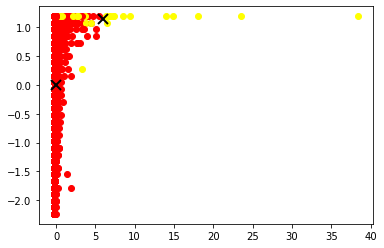

In [74]:
k=2
warna = ['red','yellow','blue','green']
y = 0
for x in labels:
    plt.scatter(cluster_data.iloc[y,0],cluster_data.iloc[y,1], color = warna[x])
    y +=1
    
for x in range(k):
    crosses = plt.plot(centroids[x,0], centroids[x,1], 'kx')
    plt.setp(crosses, ms=10.0, mew=2.0)
plt.show()

<AxesSubplot:xlabel='SHELF_LIFE', ylabel='PENJUALAN'>

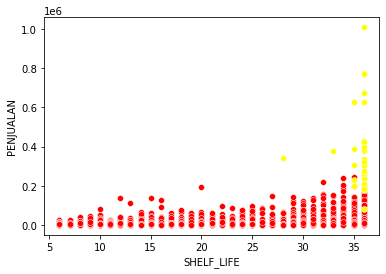

In [75]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["SEGMENT"]==0].SHELF_LIFE, y=results[results["SEGMENT"]==0].PENJUALAN, color="red")
sns.scatterplot(x=results[results["SEGMENT"]==1].SHELF_LIFE, y=results[results["SEGMENT"]==1].PENJUALAN, color="yellow")

<AxesSubplot:xlabel='SHELF_LIFE', ylabel='QTY'>

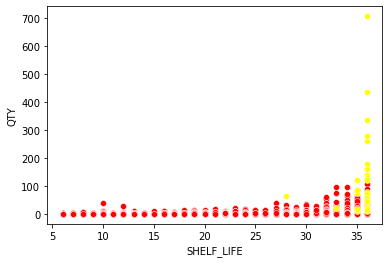

In [76]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["SEGMENT"]==0].SHELF_LIFE, y=results[results["SEGMENT"]==0].QTY, color="red")
sns.scatterplot(x=results[results["SEGMENT"]==1].SHELF_LIFE, y=results[results["SEGMENT"]==1].QTY, color="yellow")

<AxesSubplot:xlabel='CYCLE_COUNT', ylabel='PENJUALAN'>

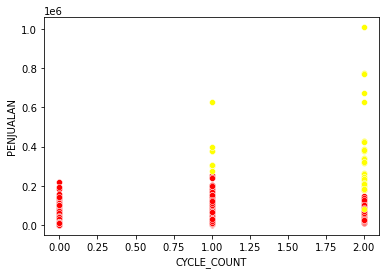

In [77]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["SEGMENT"]==0].CYCLE_COUNT, y=results[results["SEGMENT"]==0].PENJUALAN, color="red")
sns.scatterplot(x=results[results["SEGMENT"]==1].CYCLE_COUNT, y=results[results["SEGMENT"]==1].PENJUALAN, color="yellow")

<AxesSubplot:xlabel='CYCLE_COUNT', ylabel='QTY'>

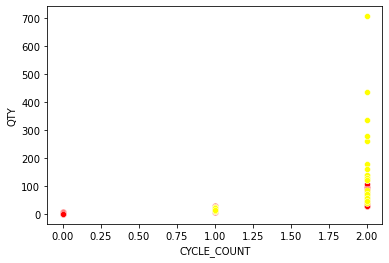

In [78]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["SEGMENT"]==0].CYCLE_COUNT, y=results[results["SEGMENT"]==0].QTY, color="red")
sns.scatterplot(x=results[results["SEGMENT"]==1].CYCLE_COUNT, y=results[results["SEGMENT"]==1].QTY, color="yellow")

Text(0.5, 1.0, 'TINGKAT SHELF LIFE TERHADAP SEGMENT')

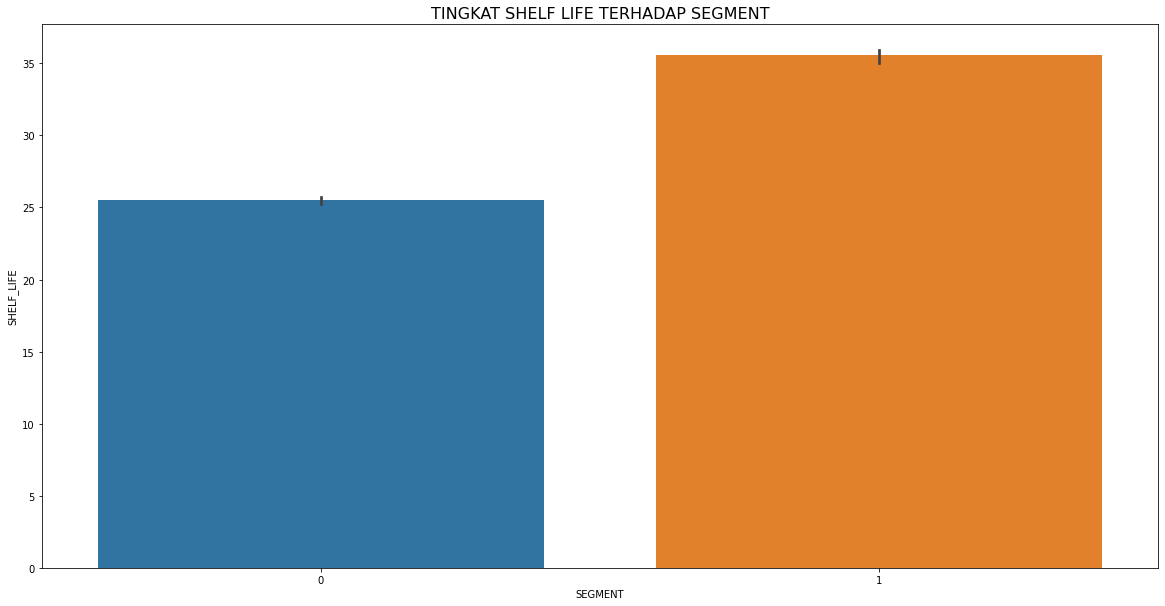

In [79]:
#membuat grafik produk terlaris
data_grafik=results.sort_values('SEGMENT',ascending=False)
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="SEGMENT",y="SHELF_LIFE", data=data_grafik)
plt.title("TINGKAT SHELF LIFE TERHADAP SEGMENT", fontsize = 16)

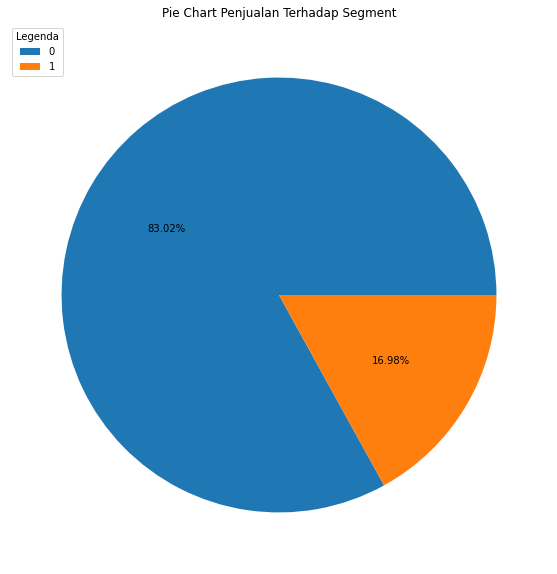

In [80]:
#mengetahui sebaran umur pelanggan
data_pie=results.groupby('SEGMENT').agg({'PENJUALAN':['sum']}).reset_index()
data_pie=data_pie.set_axis(['SEGMENT','PENJUALAN'], axis=1)
plt.figure(figsize=(10, 10))
plt.pie(data_pie['PENJUALAN'], autopct="%1.2f%%")
plt.title("Pie Chart Penjualan Terhadap Segment")
plt.legend(title="Legenda",labels=data_pie['SEGMENT'], loc='upper left')
plt.show()

In [81]:
results.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT,SEGMENT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1,0
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2,1
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0,0


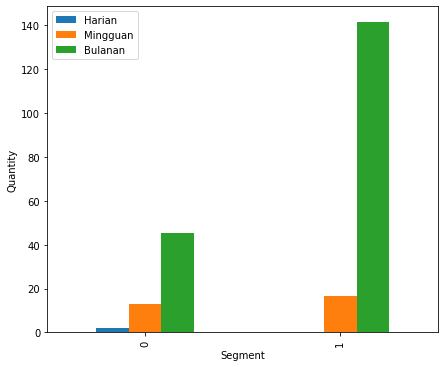

In [82]:
df_pivot = pd.pivot_table(
    results, 
    values="QTY",
    index="SEGMENT",
    columns="CYCLE_COUNT", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)

ax.legend(labels=('Harian','Mingguan','Bulanan'))

ax.set_xlabel("Segment")
ax.set_ylabel("Quantity")

fig.savefig("generasi_promo.png")

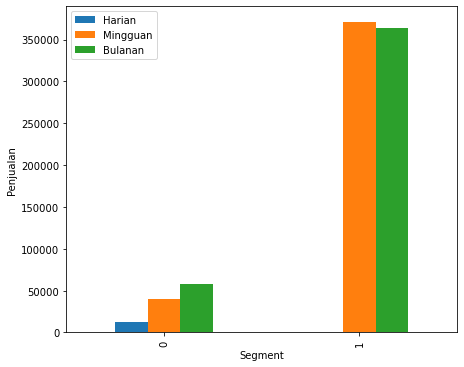

In [83]:
df_pivot = pd.pivot_table(
    results, 
    values="PENJUALAN",
    index="SEGMENT",
    columns="CYCLE_COUNT", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)

ax.legend(labels=('Harian','Mingguan','Bulanan'))

ax.set_xlabel("Segment")
ax.set_ylabel("Penjualan")

fig.savefig("generasi_promo.png")

Text(0.5, 1.0, 'TINGKAT SEGMENT TERHADAP CLUSTER')

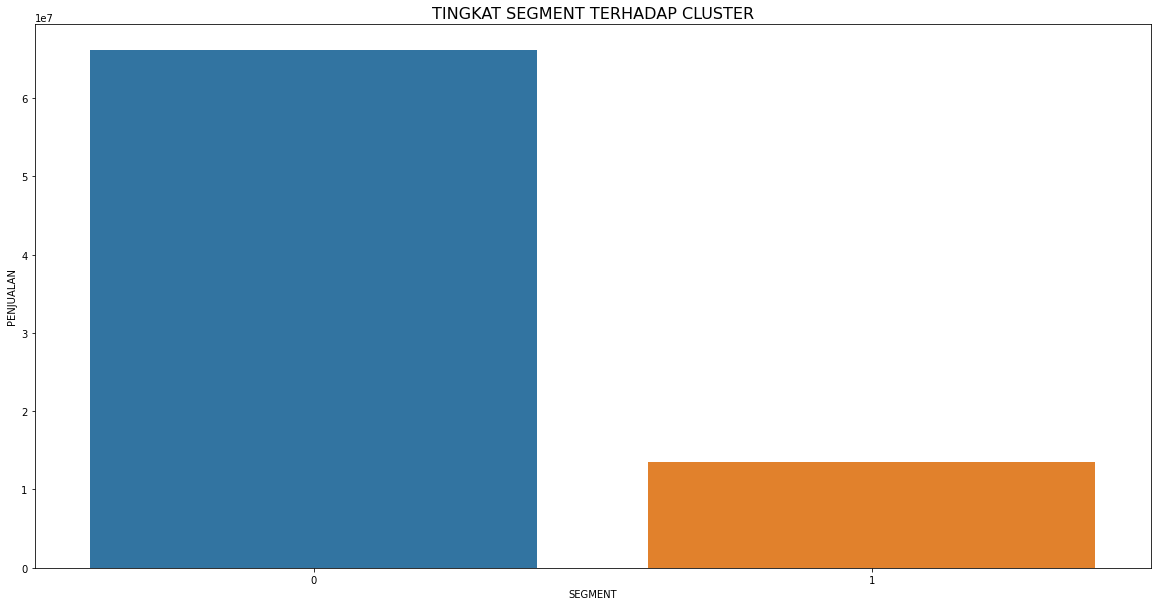

In [84]:
results2=pd.DataFrame(results.groupby("SEGMENT")['PENJUALAN'].sum()).reset_index()
#membuat grafik produk terlaris
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="SEGMENT",y="PENJUALAN", data=results2)
plt.title("TINGKAT SEGMENT TERHADAP CLUSTER", fontsize = 16)

In [85]:
results2.head()

,SEGMENT,PENJUALAN
0,0,6.611018e+07
1,1,1.351747e+07


Text(0.5, 1.0, 'TINGKAT QTY PENJUALAN TERHADAP CLUSTER')

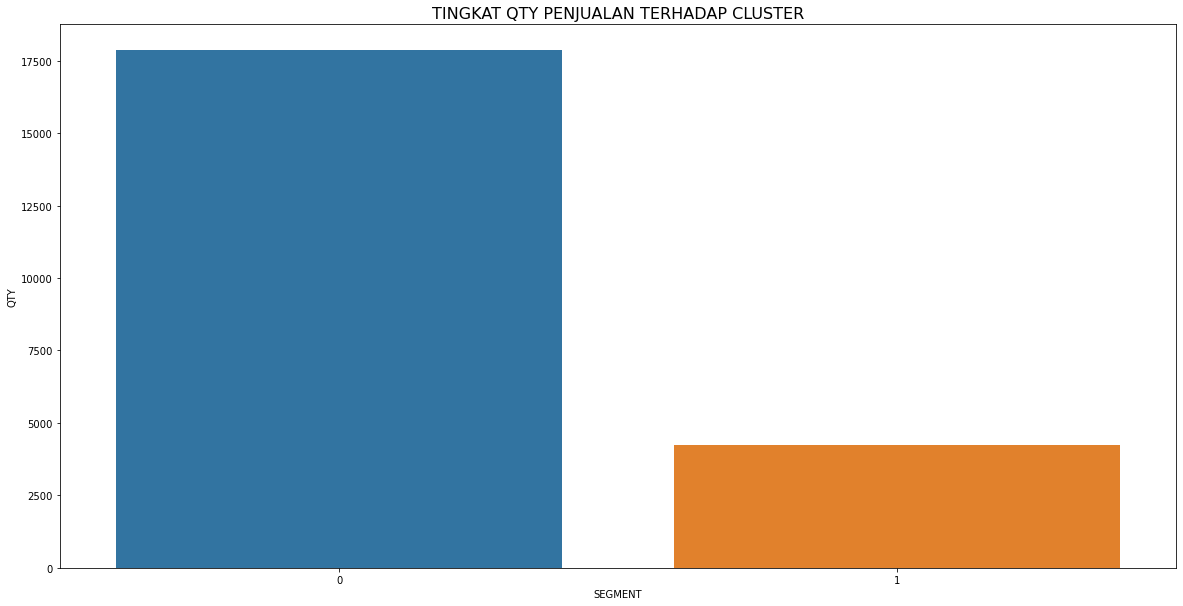

In [86]:
results2=pd.DataFrame(results.groupby("SEGMENT")['QTY'].sum()).reset_index()
#membuat grafik produk terlaris
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="SEGMENT",y="QTY", data=results2)
plt.title("TINGKAT QTY PENJUALAN TERHADAP CLUSTER", fontsize = 16)

Text(0.5, 1.0, 'TINGKAT QTY PENJUALAN TERHADAP CYCLE COUNT')

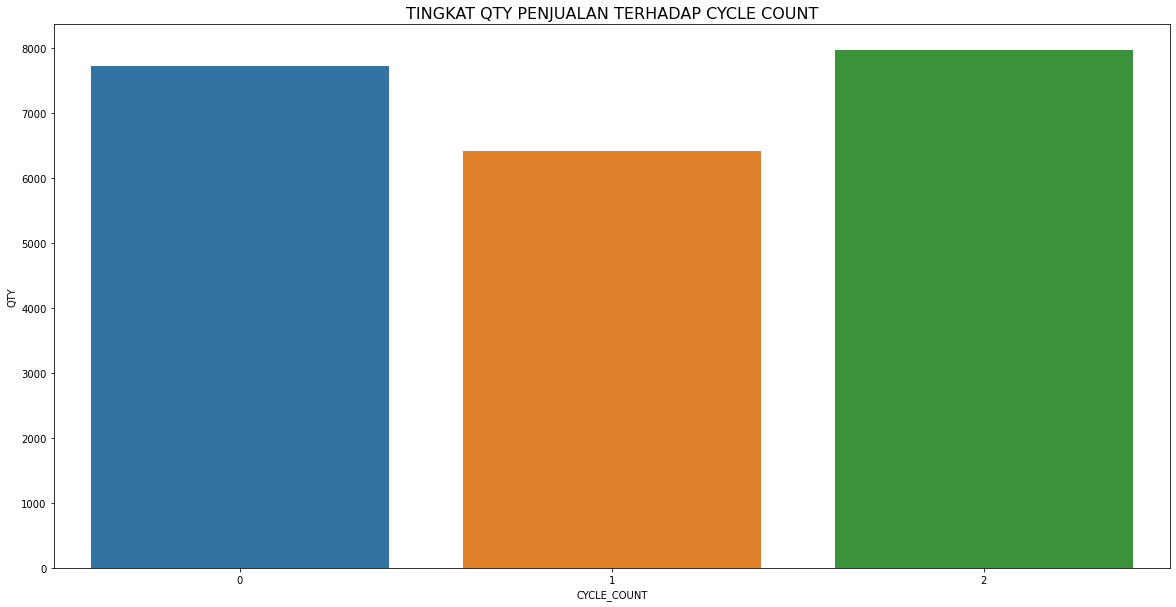

In [87]:
results2=pd.DataFrame(results.groupby("CYCLE_COUNT")['QTY'].sum()).reset_index()
#membuat grafik produk terlaris
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="CYCLE_COUNT",y="QTY", data=results2)
plt.title("TINGKAT QTY PENJUALAN TERHADAP CYCLE COUNT", fontsize = 16)

Text(0.5, 1.0, 'TINGKAT RUPIAH PENJUALAN TERHADAP CYCLE_COUNT')

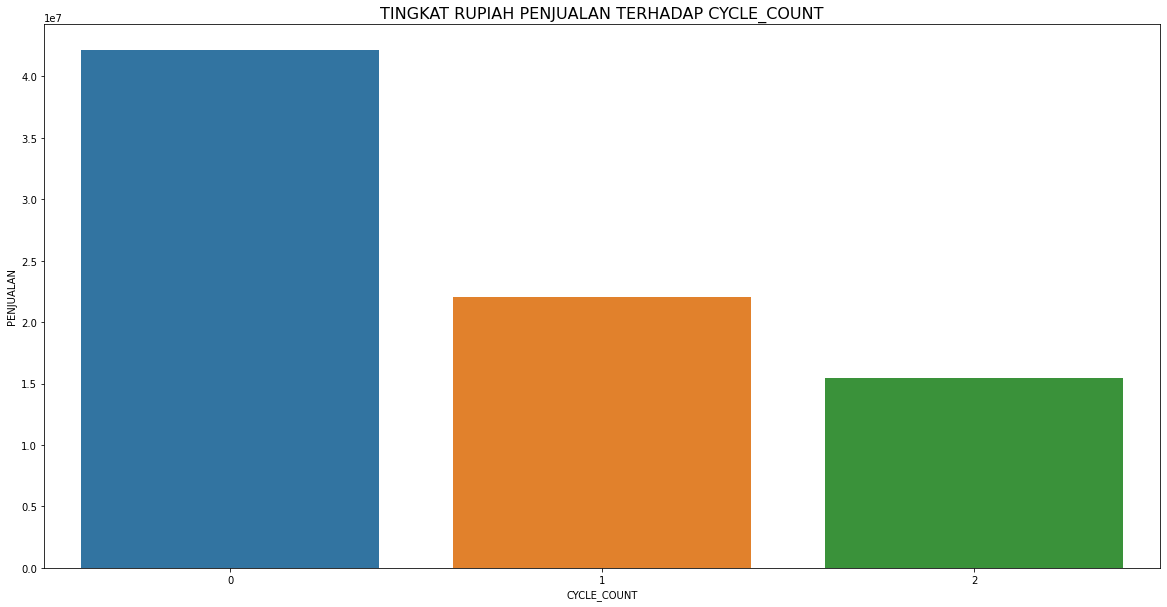

In [88]:
results2=pd.DataFrame(results.groupby("CYCLE_COUNT")['PENJUALAN'].sum()).reset_index()
#membuat grafik produk terlaris
fig , ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x="CYCLE_COUNT",y="PENJUALAN", data=results2)
plt.title("TINGKAT RUPIAH PENJUALAN TERHADAP CYCLE_COUNT", fontsize = 16)

In [89]:
data_rata.head()

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,TGL_KELUAR,TGL_MASUK,HRG_SAT_DISC,PENJUALAN,PENJ_PERHARI_QTY,PENJ_PERHARI_RP,PER_MINGGU_QTY,CYCLE_COUNT
0,13,ROTI BASAH KOTABARU,17.0,3585.714286,0,0.0,35,2022-01-05 16:31:40.484284,2022-03-10 16:31:41.686353,3585.714286,60957.142857,0.566667,2031.904762,2.428571,1
1,14,ROTI BASAH SAMBILEGI,140.0,4491.406250,0,0.0,36,2022-01-04 16:31:40.490285,2022-03-11 16:31:41.691354,4491.406250,628796.875000,4.666667,20959.895833,20.000000,2
2,1005,SGM 3 VANILA BOX 300,3.0,13315.000000,0,0.0,30,2022-01-15 16:31:40.528287,2022-03-05 16:31:41.720355,13315.000000,39945.000000,0.100000,1331.500000,0.428571,0
3,1006,DANCOW BLT MD 1+ 400,7.0,21430.000000,0,0.0,27,2022-01-16 16:31:40.016258,2022-03-02 16:31:41.915366,21430.000000,150010.000000,0.233333,5000.333333,1.000000,0
4,1019,DANCOW BLT MD 3+ 400,5.0,21430.000000,0,0.0,35,2022-01-08 16:31:40.016258,2022-03-10 16:31:41.332333,21430.000000,107150.000000,0.166667,3571.666667,0.714286,0


In [90]:
data[(data.SHELF_LIFE <= 7)]

,KODE,NAMA,QTY,HARGA,DISC_%,DISC_RP,SHELF_LIFE,STANDAR_SHELF_LIFE,HARI_INI,TGL_MULAI,TGL_SELESAI
3,24249,PERMEN PURE MRT,0.038,30000,0.0,0,6,6,2022-02-03,2022-02-03 16:31:39.808246,2022-02-09 16:31:41.189325
5,24241,PERMEN XINO XIXI/MM,0.068,31000,0.0,0,7,7,2022-02-03,2022-02-03 16:31:39.808246,2022-02-10 16:31:41.189325
8,24286,PERMEN TOFFE,0.084,33000,0.0,0,6,6,2022-02-03,2022-02-03 16:31:39.808246,2022-02-09 16:31:41.189325
14,24359,TELUR AYAM NEGRI RAS,0.122,8200,0.0,0,6,36,2022-02-03,2022-01-04 16:31:39.809246,2022-02-09 16:31:41.190325
15,24543,BAWANG BOMBAY TIMB.,0.124,5500,0.0,0,7,35,2022-02-03,2022-01-06 16:31:39.809246,2022-02-10 16:31:41.190325
...,...,...,...,...,...,...,...,...,...,...,...
14234,10807,GERY WF 2RS C+K/WPK4,10.000,440,0.0,0,6,31,2022-02-03,2022-01-09 16:31:40.855306,2022-02-09 16:31:41.976370
14253,17037,INDOMI GR.SPESIAL,10.000,950,0.0,0,6,36,2022-02-03,2022-01-04 16:31:40.856306,2022-02-09 16:31:41.977370
14262,17456,INDOMI KARI AY+BW GR,10.000,750,0.0,0,7,36,2022-02-03,2022-01-05 16:31:40.857306,2022-02-10 16:31:41.978370
14365,17041,INDOMI SOTO MIE,20.000,770,0.0,0,6,36,2022-02-03,2022-01-04 16:31:40.864306,2022-02-09 16:31:41.984370


In [91]:
data_ = data[['KODE','NAMA','QTY','HARGA','SHELF_LIFE']]
data_rata_ = data_rata[['KODE','CYCLE_COUNT']]

data_gabung= pd.merge(data_,data_rata_,on='KODE',how='left')

In [174]:
data_gabung['PENJUALAN'] = data_gabung['QTY'] * data_gabung['HARGA'] 

In [179]:
data_gabung[(data_gabung['SHELF_LIFE']<=7)].PENJUALAN.sum()

4732973.1

In [180]:
data_gabung[(data_gabung.SHELF_LIFE > 7) & (data_gabung.SHELF_LIFE <= 14)].PENJUALAN.sum()

18203934.85

In [181]:
data_gabung[(data_gabung.SHELF_LIFE > 14) & (data_gabung.SHELF_LIFE <= 30)].PENJUALAN.sum()

41117789.35

In [182]:
data_gabung[(data_gabung.SHELF_LIFE > 30)].PENJUALAN.sum()

15657821.75

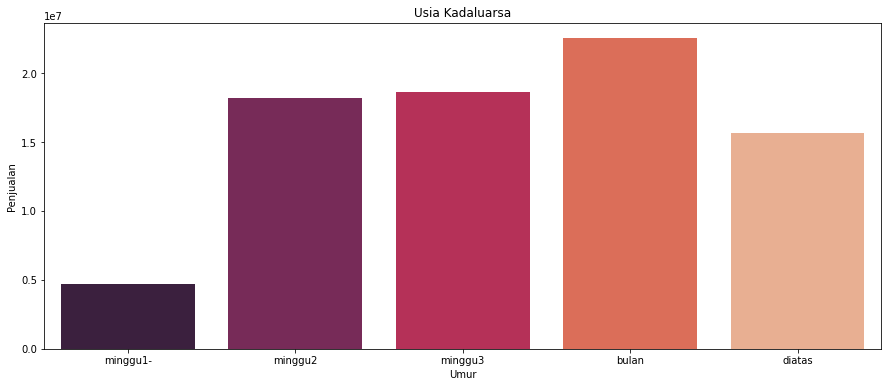

In [213]:
# Menggolongkan usia dan melihat persebarannya dalam data
minggu1 = data_gabung[(data_gabung.SHELF_LIFE >0 ) & (data_gabung.SHELF_LIFE <= 7)].PENJUALAN.sum()
minggu2 = data_gabung[(data_gabung.SHELF_LIFE >7) & (data_gabung.SHELF_LIFE <= 14)].PENJUALAN.sum()
minggu3 = data_gabung[(data_gabung.SHELF_LIFE >14) & (data_gabung.SHELF_LIFE <= 21)].PENJUALAN.sum()
bulan = data_gabung[(data_gabung.SHELF_LIFE >21) & (data_gabung.SHELF_LIFE <= 30)].PENJUALAN.sum()
diatas = data_gabung[data_gabung.SHELF_LIFE > 30].PENJUALAN.sum()

x = ["minggu1-","minggu2","minggu3","bulan","diatas"]
y = [minggu1,minggu2,minggu3,bulan,diatas]
#
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Usia Kadaluarsa")
plt.xlabel("Umur")
plt.ylabel("Penjualan")

    
plt.show()

In [206]:
print(minggu1)
print(minggu2)
print(minggu3)
print(bulan)
print(diatas)

4732973.1
18203934.85
18591727.15
22526062.2
15657821.75
